## Bert score

- bert score에 관한 블로그

https://velog.io/@tobigs-nlp/BERTScore-Evaluating-Text-Generation-with-BERT

- 다른 평가 척도  

https://velog.io/@dohee1121/Text-Generation-Metric%EC%9E%90%EC%97%B0%EC%96%B4-%EC%83%9D%EC%84%B1-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

https://devjounal.tistory.com/140

----

- 라이브러리 설치

In [7]:
pip install bert_score

     |████████████████████████████████| 60 kB 5.0 MB/s             
Note: you may need to restart the kernel to use updated packages.


In [34]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indica

In [35]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

---

In [68]:
import numpy as np
import pandas as pd
import torch
from kobart_chit_chat_Ver3 import *
import yaml
import bert_score
from bert_score import score
from tqdm import tqdm
#filename = 'logs/kobart_chitchat-last_20ep.ckpt'
filename = 'logs/kobart_chitchat-last_1ep.ckpt'
hparams = 'logs/tb_logs/default/version_3/hparams.yaml'

with open(hparams) as f:
    h = yaml.load(f, Loader=yaml.FullLoader)
    
checkpoint = torch.load(filename)

model = KoBARTConditionalGeneration(h)
model.load_state_dict(checkpoint['state_dict'])
model.model.eval()

cands_1 = []
refs_1 = []
test_file = pd.read_csv('Chatbot_data/test_dialog.csv')
for i in tqdm(range(len(test_file))): # 10개만 사용#len(test_file)
    q = test_file['Q'][i]
    a = test_file['A'][i]

    result = model.chat(q).replace('<usr>','')
    cands_1.append(result.strip())
    refs_1.append(a.strip())
# bert score을 사용한것 https://github.com/Tiiiger/bert_score
#P, R, F1 = score(cands, refs, lang="others", verbose=True, idf=True)

100%|██████████| 1183/1183 [07:33<00:00,  2.61it/s]


In [64]:
# 20 epochs 평균
print(f"System level F1 score: {F1.mean():.5f}")
print(f"System level R score: {R.mean():.5f}")
print(f"System level P score: {P.mean():.5f}")

System level F1 score: 0.77704
System level R score: 0.77755
System level P score: 0.77704


In [29]:
# 길이
print(len(P))

1183


In [74]:
P, R, F1 = score(cands_1, refs_1, lang="others", verbose=True, idf=True)

preparing IDF dict...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggin

  0%|          | 0/30 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/19 [00:00<?, ?it/s]

done in 2.38 seconds, 497.60 sentences/sec


In [76]:
# 1 epochs 평균
print(f"System level F1 score: {F1.mean():.3f}")
print(f"System level R score: {R.mean():.3f}")
print(f"System level P score: {P.mean():.3f}")

System level F1 score: 0.730
System level R score: 0.727
System level P score: 0.733


In [75]:
# 1 epoch만 한것
i = 0
for c, r in zip(cands, refs):
    if i % 50 ==0:
        print()
        print("P:",P[i], "R:",R[i], "F1:",F1[i])
        print("예측:",c)
        print("정답:",r)
        print('-'*100)
    i+=1


P: tensor(0.7620) R: tensor(0.7538) F1: tensor(0.7579)
예측: 무슨 이유인지 생각해보세요.
정답: 무슨 일이 있었나봐요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6988) R: tensor(0.7022) F1: tensor(0.7005)
예측: 시간이 걸 걸리겠지만 해낼 수 있어요.
정답: 그렇다면 정말 다행이에요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6598) R: tensor(0.6593) F1: tensor(0.6595)
예측: 정확한 사실을 알긴 힘들어요.
정답: 정확한거 본인만이 알 거예요.
----------------------------------------------------------------------------------------------------

P: tensor(0.7246) R: tensor(0.7415) F1: tensor(0.7330)
예측: 살짝 물어 흘려보세요.
정답: 살짝 물어보세요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6861) R: tensor(0.6923) F1: tensor(0.6892)
예측: 힘들 결정이었겠어요.
정답: 많이 노렸했군요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6763) R: tensor(0

In [39]:
# 20 epoch 만 한 것
i = 0
for c, r in zip(cands, refs):
    if i % 50 ==0: 
        print()
        print("P:",P[i], "R:",R[i], "F1:",F1[i])
        print("예측:",c)
        print("정답:",r)
        print('-'*100)
    i+=1


P: tensor(0.8017) R: tensor(0.8223) F1: tensor(0.8119)
예측: 무슨 이유인지 생각해보세요.
정답: 무슨 일이 있었나봐요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6628) R: tensor(0.6767) F1: tensor(0.6697)
예측: 시간이 걸 걸리겠지만 해낼 수 있어요.
정답: 그렇다면 정말 다행이에요.
----------------------------------------------------------------------------------------------------

P: tensor(0.7739) R: tensor(0.7516) F1: tensor(0.7626)
예측: 정확한 사실을 알긴 힘들어요.
정답: 정확한거 본인만이 알 거예요.
----------------------------------------------------------------------------------------------------

P: tensor(0.9144) R: tensor(0.9420) F1: tensor(0.9280)
예측: 살짝 물어 흘려보세요.
정답: 살짝 물어보세요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6973) R: tensor(0.7119) F1: tensor(0.7046)
예측: 힘들 결정이었겠어요.
정답: 많이 노렸했군요.
----------------------------------------------------------------------------------------------------

P: tensor(0.6765) R: tensor(0

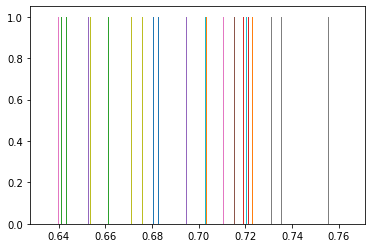

In [21]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=10)
plt.show()

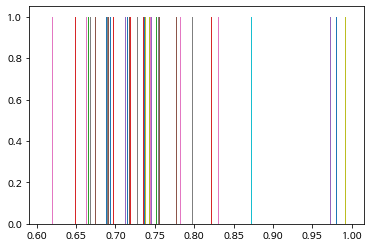

In [36]:
import matplotlib.pyplot as plt
plt.hist(F1, bins=10)
plt.show()

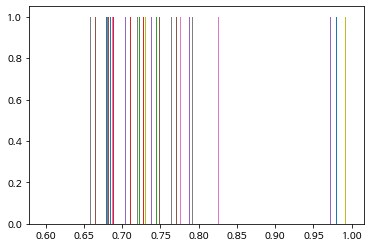

In [40]:
import matplotlib.pyplot as plt
plt.hist(R, bins=10)
plt.show()

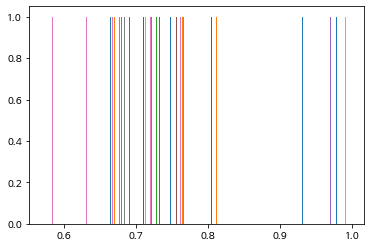

In [41]:
import matplotlib.pyplot as plt
plt.hist(P, bins=10)
plt.show()

In [13]:
plot_example

<function bert_score.score.plot_example(candidate, reference, model_type=None, num_layers=None, lang=None, rescale_with_baseline=False, baseline_path=None, use_fast_tokenizer=False, fname='')>

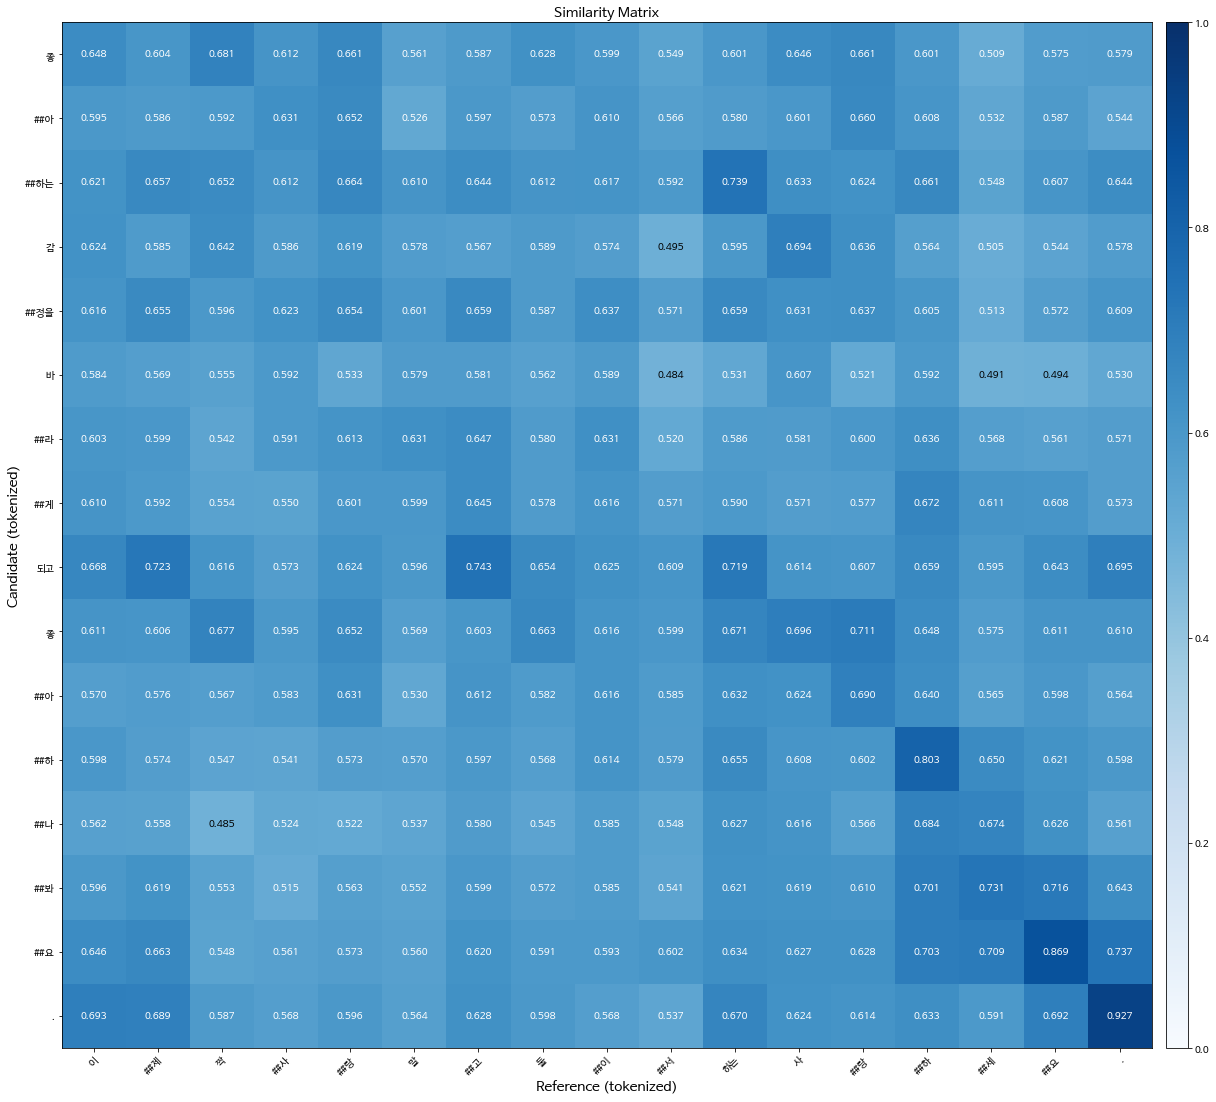

In [43]:
from bert_score import plot_example

cand = cands[51]
ref = refs[51]
plot_example(cand, ref, lang="others")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


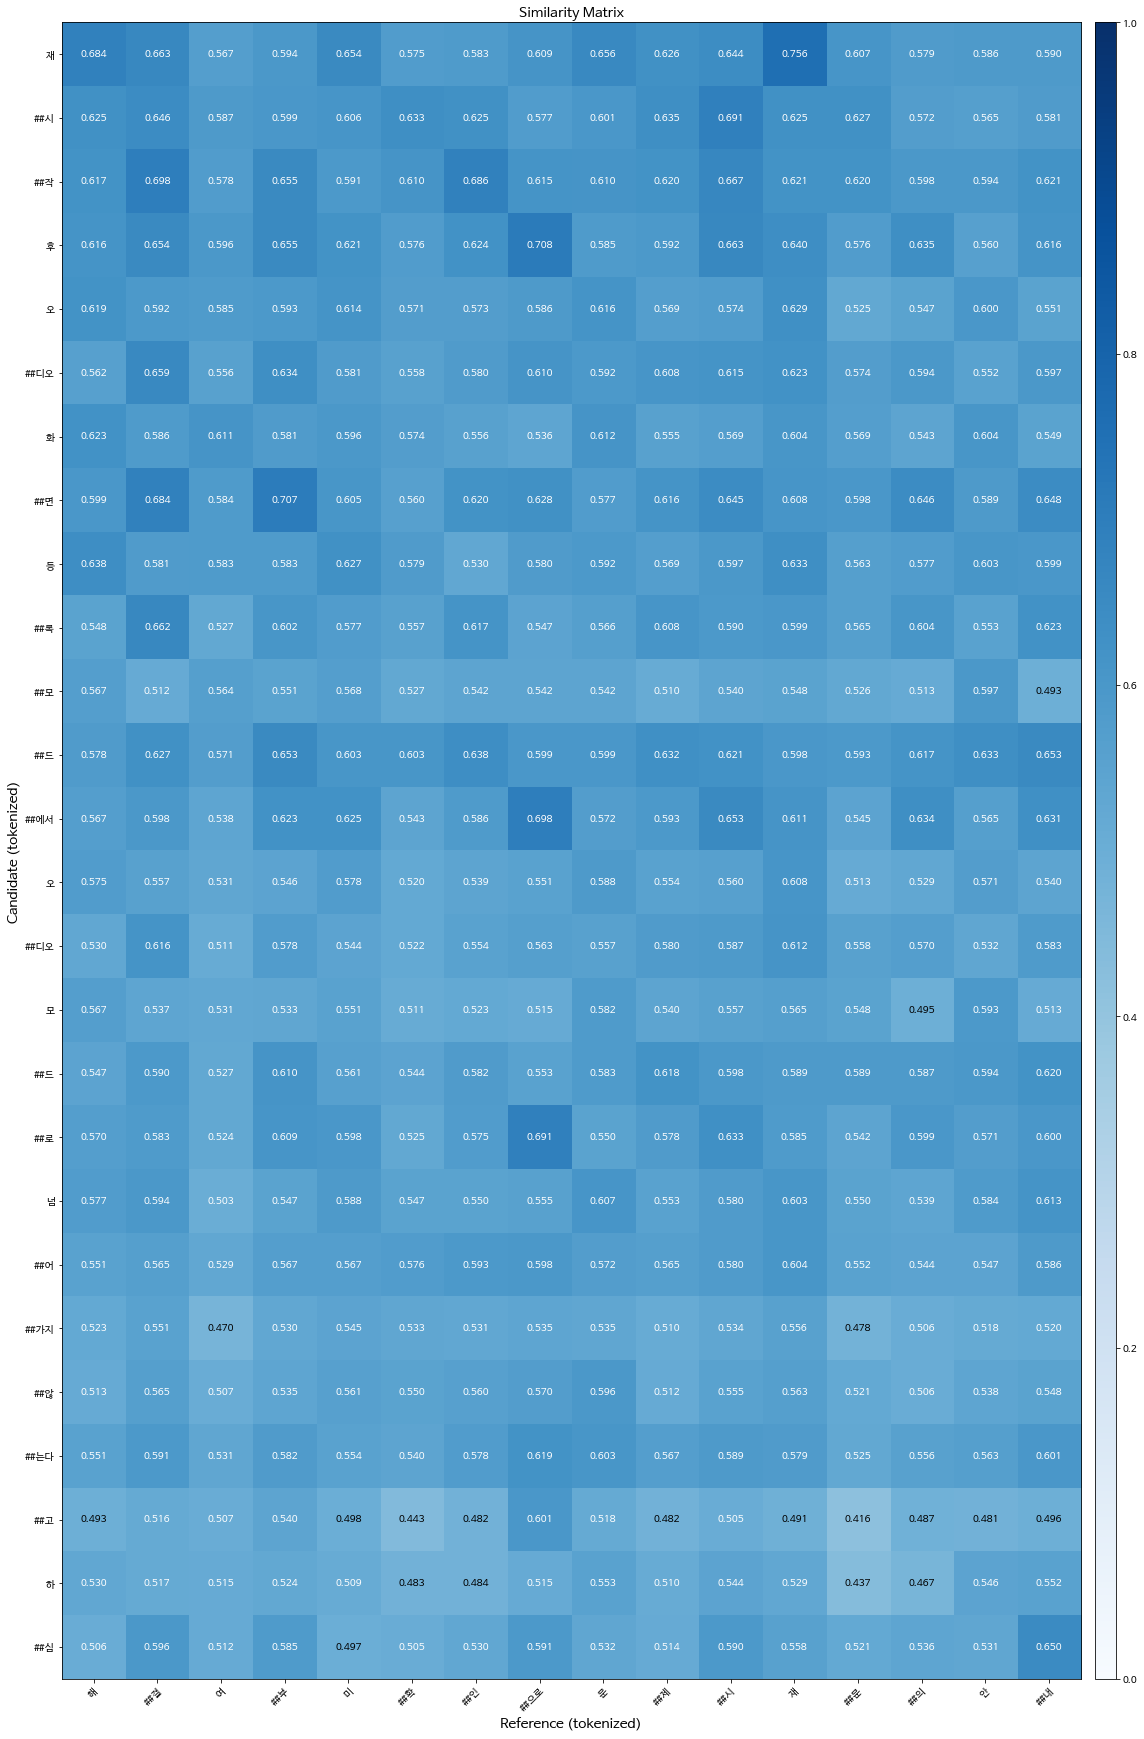

In [21]:
cand = cands[1]
ref = refs[1]
plot_example(cand, ref, lang="others")

----

#### https://github.com/huggingface/datasets/tree/main/metrics/bertscore
huggingface의 bertscore을 사용했을때

In [6]:
from datasets import load_metric
bertscore = load_metric("bertscore")
results = bertscore.compute(predictions=cands, references=refs, model_type="distilbert-base-uncased")

In [7]:
print(results)

{'precision': [0.8941866159439087, 0.9058387279510498, 0.8563244342803955, 0.8897190690040588, 0.4534755349159241, 0.8193306922912598, 0.895875096321106, 0.8239715099334717, 0.8190066814422607, 0.6118728518486023], 'recall': [0.8895580172538757, 0.91404789686203, 0.8726322650909424, 0.9171786308288574, 0.5893003344535828, 0.8713561296463013, 0.8481966257095337, 0.820833683013916, 0.9170016050338745, 0.46338337659835815], 'f1': [0.8918663859367371, 0.9099247455596924, 0.8644014596939087, 0.9032402634620667, 0.5125421285629272, 0.8445429801940918, 0.8713841438293457, 0.8223996162414551, 0.8652383089065552, 0.5273751020431519], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.25.1)'}


----

In [61]:
# 20 ep
from datasets import load_metric
bertscore = load_metric("bertscore")
results = bertscore.compute(predictions=cands, references=refs, model_type="distilbert-base-uncased")

Downloading:   0%|          | 0.00/2.93k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [62]:
print(results)

{'precision': [0.8918516635894775, 0.9220010042190552, 0.8414516448974609, 0.9123063087463379, 0.8836344480514526, 0.8929026126861572, 0.9999998807907104, 0.8923998475074768, 0.5478960275650024, 0.9527949690818787, 0.8814908266067505, 0.9923439621925354, 0.8621309995651245, 0.8256703615188599, 0.9086431264877319, 0.8582316040992737, 0.8839010000228882, 1.000000238418579, 0.9372715950012207, 0.9374152421951294, 1.0, 0.9000452756881714, 1.0, 0.8793020248413086, 0.8352383375167847, 0.8903440237045288, 0.9345870614051819, 0.9105759859085083, 0.9239469766616821, 0.6972328424453735, 0.8602871894836426, 0.9548519849777222, 0.9124878644943237, 0.89519202709198, 0.8753378391265869, 0.9059579372406006, 0.9018938541412354, 0.9054134488105774, 0.882499098777771, 0.9017034769058228, 0.9111068248748779, 0.9018439054489136, 0.8771036267280579, 0.8938373327255249, 0.971782922744751, 0.9538133144378662, 1.000000238418579, 0.894446611404419, 0.868810772895813, 0.880440354347229, 0.8866047859191895, 0.92

In [65]:
# 20 epochs 평균
print("p:", np.mean(results['precision']))
print("r:", np.mean(results['recall']))
print("f1:", np.mean(results['f1']))

p: 0.9002557783084508
r: 0.9006522978551289
f1: 0.8984704723523415


In [71]:
# 1 epochs
from datasets import load_metric
bertscore = load_metric("bertscore", idf=True)
results = bertscore.compute(predictions=cands_1, references=refs_1, model_type="distilbert-base-uncased")

In [72]:
# 1 epochs 평균
print("p:", np.mean(results['precision']))
print("r:", np.mean(results['recall']))
print("f1:", np.mean(results['f1']))

p: 0.8779483468272579
r: 0.8665592738459499
f1: 0.8697345123286985


---

- 다른 평가 척도 시도했지만 잘 안됨

In [46]:
import torch
from torchnlp.metrics import get_moses_multi_bleu
# 20 epochs 
get_moses_multi_bleu(cands, refs,  lowercase=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


17.84

In [73]:
import torch
from torchnlp.metrics import get_moses_multi_bleu
# 1 epochs 
get_moses_multi_bleu(cands_1, refs_1,  lowercase=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


0.82

In [224]:
print(cands_1[40])
print(refs_1[40])

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands_1[40], reference=[refs_1[40]])
result_1 = bleu_metric.compute(smooth_method = 'floor')
result_1['precisions'] = [np.round(p,2) for p in result_1['precisions']]
print(result_1)

많은 시간이 흘렀네요.
그러게요. 어느덧 한달이에요.
{'score': 6.257106818159156, 'counts': [1, 0, 0, 0], 'totals': [4, 3, 2, 1], 'precisions': [25.0, 3.33, 5.0, 10.0], 'bp': 0.7788007830714049, 'sys_len': 4, 'ref_len': 5}


In [225]:
print(cands_1[40])
print(refs_1[40])

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands_1[40], reference=[refs_1[40]])
result_ko_1 = bleu_metric.compute(smooth_method = 'exp',tokenize='ko-mecab')
result_ko_1['precisions'] = [np.round(p,2) for p in result_ko_1['precisions']]
print(result_ko_1)

많은 시간이 흘렀네요.
그러게요. 어느덧 한달이에요.
{'score': 5.868924818816531, 'counts': [2, 0, 0, 0], 'totals': [7, 6, 5, 4], 'precisions': [28.57, 8.33, 5.0, 3.12], 'bp': 0.7514772930752859, 'sys_len': 7, 'ref_len': 9}


In [148]:
pd.DataFrame.from_dict(result_1, orient = 'index', columns = ["value"])

,value
score,0.0
counts,"[1, 0, 0, 0]"
totals,"[4, 3, 2, 1]"
precisions,"[25.0, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,4
ref_len,4


In [149]:
pd.DataFrame.from_dict(result_ko_1, orient = 'index', columns = ["value"])

,value
score,0.0
counts,"[2, 1, 0, 0]"
totals,"[9, 8, 7, 6]"
precisions,"[22.22, 12.5, 0.0, 0.0]"
bp,1.0
sys_len,9
ref_len,7


In [167]:
print(cands[22])
print(refs[22])

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands[22], reference=[refs[22]])
result_20 = bleu_metric.compute(smooth_method = "floor", smooth_value=0)
result_20['precisions'] = [np.round(p,2) for p in result_20['precisions']]

print(result_20)

지금은 우세요.
지금은 우세요.
{'score': 0.0, 'counts': [3, 2, 1, 0], 'totals': [3, 2, 1, 0], 'precisions': [100.0, 100.0, 100.0, 0.0], 'bp': 1.0, 'sys_len': 3, 'ref_len': 3}


In [214]:
print(cands_1[11])
print(refs_1[11])

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands_1[11], reference=[refs_1[11]])
result_ko_20 = bleu_metric.compute(tokenize='ko-mecab')
result_ko_20['precisions'] = [np.round(p,2) for p in result_ko_20['precisions']]

print(result_ko_20)

정말 사랑했나봐요.
정말 사랑했다면 후회하지 않을거예요.
{'score': 11.943865131127652, 'counts': [4, 2, 1, 0], 'totals': [6, 5, 4, 3], 'precisions': [66.67, 40.0, 25.0, 16.67], 'bp': 0.36787944117144233, 'sys_len': 6, 'ref_len': 12}


In [189]:
cands = "정말 밥 먹고싶다"
refs = "정말 밥이 먹고싶다"

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands, reference=[refs])
result_ko_20 = bleu_metric.compute(smooth_method = "floor", smooth_value=0,tokenize='ko-mecab')
result_ko_20['precisions'] = [np.round(p,2) for p in result_ko_20['precisions']]

print(result_ko_20)

{'score': 51.15078115793242, 'counts': [6, 4, 2, 1], 'totals': [6, 5, 4, 3], 'precisions': [100.0, 80.0, 50.0, 33.33], 'bp': 0.846481724890614, 'sys_len': 6, 'ref_len': 7}


In [213]:
cands = "누구니 정말 집에 갈래요"
refs = ["정말 밥을 먹고싶다", "너는 누구니?"]

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands, reference=refs)
result_ko_20 = bleu_metric.compute(tokenize='ko-mecab')
result_ko_20['precisions'] = [np.round(p,2) for p in result_ko_20['precisions']]

print(result_ko_20)

{'score': 17.965205598154213, 'counts': [3, 1, 0, 0], 'totals': [6, 5, 4, 3], 'precisions': [50.0, 20.0, 12.5, 8.33], 'bp': 1.0, 'sys_len': 6, 'ref_len': 5}


In [201]:
cands = "정말 밥 찐하고싶다"
refs = "정말 밥을 찐먹고싶다"

import datasets
from datasets import load_metric
bleu_metric  = load_metric("sacrebleu")
bleu_metric.add(prediction=cands, reference=[refs])
result_ko_20 = bleu_metric.compute(smooth_method = "floor", smooth_value=0,tokenize='ko-mecab')
result_ko_20['precisions'] = [np.round(p,2) for p in result_ko_20['precisions']]

print(result_ko_20)

{'score': 0.0, 'counts': [5, 3, 1, 0], 'totals': [6, 5, 4, 3], 'precisions': [83.33, 60.0, 25.0, 0.0], 'bp': 0.7165313105737893, 'sys_len': 6, 'ref_len': 8}
